In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Load in csv
university_data= ("Most-Recent-Cohorts-All-Data-Elements.csv")

university_df = pd.read_csv(university_data)
reduced_university_df =university_df[["UNITID","INSTNM","CONTROL","CITY","STABBR","ZIP","ACCREDAGENCY",
                                     "INSTURL","LATITUDE","LONGITUDE","MN_EARN_WNE_P6","MN_EARN_WNE_P8","MN_EARN_WNE_P10"]]
reduced_university_df = reduced_university_df.rename(
    columns={"UNITID":"University ID","INSTNM":"University Name","CONTROL": "Control of Institution", "CITY":"City","STABBR":"State","ZIP":"Zip",
                                     "INSTURL":"Website","LATITUDE":"Latitude","LONGITUDE":"Longitude",
             "MN_EARN_WNE_P6":"Mean Earnings 6","MN_EARN_WNE_P8": "Mean Earnings 8","MN_EARN_WNE_P10":"Mean Earnings 10"})


reduced_university_df.head(5)

C:\Users\finne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (31,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1640,1643,1648,1657,1666,1669,1674,1683,1688,1689,1690,1691,1692,1697,1700,1703,1704,1705,1706,1707,1726,1727,1728,1729,1815,1817,1823,1830,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,University ID,University Name,Control of Institution,City,State,Zip,ACCREDAGENCY,Website,Latitude,Longitude,Mean Earnings 6,Mean Earnings 8,Mean Earnings 10
0,100654,Alabama A & M University,1,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,34.783368,-86.568502,28400,30600,35500
1,100663,University of Alabama at Birmingham,1,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,33.505697,-86.799345,39400,44100,48400
2,100690,Amridge University,2,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,32.362609,-86.174010,35400,40800,47600
3,100706,University of Alabama in Huntsville,1,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,34.724557,-86.640449,40300,45900,52000
4,100724,Alabama State University,1,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,32.364317,-86.295677,24400,27500,30600


In [3]:
reduced_university_df = reduced_university_df.replace({1: "Public", 2: "Private Nonprofit", 3: "Private For-Profit"})
reduced_university_df.head()

,University ID,University Name,Control of Institution,City,State,Zip,ACCREDAGENCY,Website,Latitude,Longitude,Mean Earnings 6,Mean Earnings 8,Mean Earnings 10
0,100654,Alabama A & M University,Public,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,34.783368,-86.568502,28400,30600,35500
1,100663,University of Alabama at Birmingham,Public,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,33.505697,-86.799345,39400,44100,48400
2,100690,Amridge University,Private Nonprofit,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,32.362609,-86.174010,35400,40800,47600
3,100706,University of Alabama in Huntsville,Public,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,34.724557,-86.640449,40300,45900,52000
4,100724,Alabama State University,Public,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,32.364317,-86.295677,24400,27500,30600


In [4]:
#Creating Post Graduate Earnings after 6 Years by School/Control of Institution

institution_earnings_6 = reduced_university_df[["University ID", "University Name", "Control of Institution", "Mean Earnings 6"]]

institution_earnings_6 = institution_earnings_6.set_index("Mean Earnings 6")

institution_earnings_6.head()

,University ID,University Name,Control of Institution
Mean Earnings 6,,,
28400,100654,Alabama A & M University,Public
39400,100663,University of Alabama at Birmingham,Public
35400,100690,Amridge University,Private Nonprofit
40300,100706,University of Alabama in Huntsville,Public
24400,100724,Alabama State University,Public


In [5]:
institution_earnings_6 = institution_earnings_6.drop("PrivacySuppressed", axis=0)

institution_earnings_6.head()

,University ID,University Name,Control of Institution
Mean Earnings 6,,,
28400,100654,Alabama A & M University,Public
39400,100663,University of Alabama at Birmingham,Public
35400,100690,Amridge University,Private Nonprofit
40300,100706,University of Alabama in Huntsville,Public
24400,100724,Alabama State University,Public


In [6]:
institution_earnings_6 = institution_earnings_6.reset_index()

institution_earnings_6.head()

,Mean Earnings 6,University ID,University Name,Control of Institution
0,28400,100654,Alabama A & M University,Public
1,39400,100663,University of Alabama at Birmingham,Public
2,35400,100690,Amridge University,Private Nonprofit
3,40300,100706,University of Alabama in Huntsville,Public
4,24400,100724,Alabama State University,Public


In [7]:
institution_earnings_6.dropna(how='any',inplace=True)

In [8]:
institution_earnings_6.count()

Mean Earnings 6           5358
University ID             5358
University Name           5358
Control of Institution    5358
dtype: int64

In [9]:
institution_earnings_6.dtypes

Mean Earnings 6           object
University ID              int64
University Name           object
Control of Institution    object
dtype: object

In [10]:
institution_earnings_6['Mean Earnings 6'] = pd.to_numeric(institution_earnings_6['Mean Earnings 6'])

In [11]:
institution_earnings_6.sort_values('Mean Earnings 6', ascending=False).head()

,Mean Earnings 6,University ID,University Name,Control of Institution
2903,151500,215123,Philadelphia College of Osteopathic Medicine,Private Nonprofit
1781,123700,177834,A T Still University of Health Sciences,Private Nonprofit
257,109800,112525,Western University of Health Sciences,Private Nonprofit
2068,109500,189501,Brooklyn Law School,Private Nonprofit
220,105400,110699,University of California-San Francisco,Public


In [12]:
#Final copy of Post Graduate Earnings after 6 Years by School/Control of Institution

institution_earnings_6_df = institution_earnings_6[["University ID", "University Name", "Control of Institution", "Mean Earnings 6"]]

institution_earnings_6_df.head()

,University ID,University Name,Control of Institution,Mean Earnings 6
0,100654,Alabama A & M University,Public,28400
1,100663,University of Alabama at Birmingham,Public,39400
2,100690,Amridge University,Private Nonprofit,35400
3,100706,University of Alabama in Huntsville,Public,40300
4,100724,Alabama State University,Public,24400


In [13]:
#Sum of Earnings after 6 years by Contol of Institution

sum_institution_earnings_6 = institution_earnings_6_df.groupby(["Control of Institution", "University Name"]).sum()["Mean Earnings 6"]

sum_private_nonprofit_6 = sum_institution_earnings_6["Private Nonprofit"].sum()

sum_private_forprofit_6 = sum_institution_earnings_6["Private For-Profit"].sum()

sum_public_6 = sum_institution_earnings_6["Public"].sum()


In [14]:
#Creating Post Graduate Earnings after 8 Years by School/Control of Institution

institution_earnings_8 = reduced_university_df[["University ID", "University Name", "Control of Institution", "Mean Earnings 8"]]

institution_earnings_8 = institution_earnings_8.set_index("Mean Earnings 8")

institution_earnings_8.head()

,University ID,University Name,Control of Institution
Mean Earnings 8,,,
30600,100654,Alabama A & M University,Public
44100,100663,University of Alabama at Birmingham,Public
40800,100690,Amridge University,Private Nonprofit
45900,100706,University of Alabama in Huntsville,Public
27500,100724,Alabama State University,Public


In [15]:
institution_earnings_8 = institution_earnings_8.drop("PrivacySuppressed", axis=0)

institution_earnings_8.head()

,University ID,University Name,Control of Institution
Mean Earnings 8,,,
30600,100654,Alabama A & M University,Public
44100,100663,University of Alabama at Birmingham,Public
40800,100690,Amridge University,Private Nonprofit
45900,100706,University of Alabama in Huntsville,Public
27500,100724,Alabama State University,Public


In [16]:
institution_earnings_8 = institution_earnings_8.reset_index()

institution_earnings_8.head()

,Mean Earnings 8,University ID,University Name,Control of Institution
0,30600,100654,Alabama A & M University,Public
1,44100,100663,University of Alabama at Birmingham,Public
2,40800,100690,Amridge University,Private Nonprofit
3,45900,100706,University of Alabama in Huntsville,Public
4,27500,100724,Alabama State University,Public


In [17]:
institution_earnings_8.dropna(how='any',inplace=True)

In [18]:
institution_earnings_8.count()

Mean Earnings 8           5235
University ID             5235
University Name           5235
Control of Institution    5235
dtype: int64

In [19]:
institution_earnings_8.dtypes

Mean Earnings 8           object
University ID              int64
University Name           object
Control of Institution    object
dtype: object

In [20]:
institution_earnings_8['Mean Earnings 8'] = pd.to_numeric(institution_earnings_8['Mean Earnings 8'])

In [21]:
institution_earnings_8.sort_values('Mean Earnings 8', ascending=False).head()

,Mean Earnings 8,University ID,University Name,Control of Institution
3597,250000,239169,Medical College of Wisconsin,Private Nonprofit
2556,204200,204477,Northeast Ohio Medical University,Public
2050,201000,188580,Albany Medical College,Private Nonprofit
3565,191900,237880,West Virginia School of Osteopathic Medicine,Public
2900,185000,215123,Philadelphia College of Osteopathic Medicine,Private Nonprofit


In [22]:
#Final copy of Post Graduate Earnings after 8 Years by School/Control of Institution

institution_earnings_8_df = institution_earnings_8[["University ID", "University Name", "Control of Institution", "Mean Earnings 8"]]

institution_earnings_8_df.head()

,University ID,University Name,Control of Institution,Mean Earnings 8
0,100654,Alabama A & M University,Public,30600
1,100663,University of Alabama at Birmingham,Public,44100
2,100690,Amridge University,Private Nonprofit,40800
3,100706,University of Alabama in Huntsville,Public,45900
4,100724,Alabama State University,Public,27500


In [23]:
#Sum of Earnings after 8 years by Contol of Institution

sum_institution_earnings_8 = institution_earnings_8_df.groupby(["Control of Institution", "University Name"]).sum()["Mean Earnings 8"]

sum_private_nonprofit_8 = sum_institution_earnings_8["Private Nonprofit"].sum()

sum_private_forprofit_8 = sum_institution_earnings_8["Private For-Profit"].sum()

sum_public_8 = sum_institution_earnings_8["Public"].sum()


In [24]:
#Creating Post Graduate Earnings after 10 Years by School/Control of Institution

institution_earnings_10 = reduced_university_df[["University ID", "University Name", "Control of Institution", "Mean Earnings 10"]]

institution_earnings_10 = institution_earnings_10.set_index("Mean Earnings 10")

institution_earnings_10.head()

,University ID,University Name,Control of Institution
Mean Earnings 10,,,
35500,100654,Alabama A & M University,Public
48400,100663,University of Alabama at Birmingham,Public
47600,100690,Amridge University,Private Nonprofit
52000,100706,University of Alabama in Huntsville,Public
30600,100724,Alabama State University,Public


In [25]:
institution_earnings_10 = institution_earnings_10.drop("PrivacySuppressed", axis=0)

institution_earnings_10.head()

,University ID,University Name,Control of Institution
Mean Earnings 10,,,
35500,100654,Alabama A & M University,Public
48400,100663,University of Alabama at Birmingham,Public
47600,100690,Amridge University,Private Nonprofit
52000,100706,University of Alabama in Huntsville,Public
30600,100724,Alabama State University,Public


In [26]:
institution_earnings_10 = institution_earnings_10.reset_index()

institution_earnings_10.head()

,Mean Earnings 10,University ID,University Name,Control of Institution
0,35500,100654,Alabama A & M University,Public
1,48400,100663,University of Alabama at Birmingham,Public
2,47600,100690,Amridge University,Private Nonprofit
3,52000,100706,University of Alabama in Huntsville,Public
4,30600,100724,Alabama State University,Public


In [27]:
institution_earnings_10.dropna(how='any',inplace=True)

In [28]:
institution_earnings_10.count()

Mean Earnings 10          5175
University ID             5175
University Name           5175
Control of Institution    5175
dtype: int64

In [29]:
institution_earnings_10.dtypes

Mean Earnings 10          object
University ID              int64
University Name           object
Control of Institution    object
dtype: object

In [30]:
institution_earnings_10['Mean Earnings 10'] = pd.to_numeric(institution_earnings_10['Mean Earnings 10'])

In [31]:
institution_earnings_10.sort_values('Mean Earnings 10', ascending=False).head()

,Mean Earnings 10,University ID,University Name,Control of Institution
2643,250000,207315,Oklahoma State University Center for Health Sc...,Public
3594,250000,239169,Medical College of Wisconsin,Private Nonprofit
3562,238200,237880,West Virginia School of Osteopathic Medicine,Public
2192,229700,193830,New York Medical College,Private Nonprofit
1783,213500,177834,A T Still University of Health Sciences,Private Nonprofit


In [32]:
#Final copy of Post Graduate Earnings after 10 Years by School/Control of Institution

institution_earnings_10_df = institution_earnings_10[["University ID", "University Name", "Control of Institution", "Mean Earnings 10"]]

institution_earnings_10_df.head()

,University ID,University Name,Control of Institution,Mean Earnings 10
0,100654,Alabama A & M University,Public,35500
1,100663,University of Alabama at Birmingham,Public,48400
2,100690,Amridge University,Private Nonprofit,47600
3,100706,University of Alabama in Huntsville,Public,52000
4,100724,Alabama State University,Public,30600


In [33]:
#Sum of Earnings after 10 years by Contol of Institution

sum_institution_earnings_10 = institution_earnings_10_df.groupby(["Control of Institution", "University Name"]).sum()["Mean Earnings 10"]

sum_private_nonprofit_10 = sum_institution_earnings_10["Private Nonprofit"].sum()

sum_private_forprofit_10 = sum_institution_earnings_10["Private For-Profit"].sum()

sum_public_10 = sum_institution_earnings_10["Public"].sum()


In [34]:
#Percent Change by School/Control of Institution
percent_change = reduced_university_df[["University ID", "University Name", "Control of Institution", 
                                        "Mean Earnings 6", "Mean Earnings 8", "Mean Earnings 10"]]

percent_change = percent_change.set_index("Mean Earnings 6")

percent_change = percent_change.drop("PrivacySuppressed", axis=0)

percent_change = percent_change.reset_index()



In [35]:
percent_change = percent_change.set_index("Mean Earnings 8")

percent_change = percent_change.drop("PrivacySuppressed", axis=0)

percent_change = percent_change.reset_index()

percent_change.head()

,Mean Earnings 8,Mean Earnings 6,University ID,University Name,Control of Institution,Mean Earnings 10
0,30600,28400,100654,Alabama A & M University,Public,35500
1,44100,39400,100663,University of Alabama at Birmingham,Public,48400
2,40800,35400,100690,Amridge University,Private Nonprofit,47600
3,45900,40300,100706,University of Alabama in Huntsville,Public,52000
4,27500,24400,100724,Alabama State University,Public,30600


In [36]:
percent_change = percent_change.set_index("Mean Earnings 10")

percent_change = percent_change.drop("PrivacySuppressed", axis=0)

percent_change = percent_change.reset_index()

percent_change.head()

,Mean Earnings 10,Mean Earnings 8,Mean Earnings 6,University ID,University Name,Control of Institution
0,35500,30600,28400,100654,Alabama A & M University,Public
1,48400,44100,39400,100663,University of Alabama at Birmingham,Public
2,47600,40800,35400,100690,Amridge University,Private Nonprofit
3,52000,45900,40300,100706,University of Alabama in Huntsville,Public
4,30600,27500,24400,100724,Alabama State University,Public


In [37]:
percent_change.dtypes

Mean Earnings 10          object
Mean Earnings 8           object
Mean Earnings 6           object
University ID              int64
University Name           object
Control of Institution    object
dtype: object

In [38]:
percent_change['Mean Earnings 6'] = pd.to_numeric(percent_change['Mean Earnings 6'])

In [39]:
percent_change.dtypes

Mean Earnings 10           object
Mean Earnings 8            object
Mean Earnings 6           float64
University ID               int64
University Name            object
Control of Institution     object
dtype: object

In [40]:
percent_change['Mean Earnings 8'] = pd.to_numeric(percent_change['Mean Earnings 8'])

In [41]:
percent_change.dtypes

Mean Earnings 10           object
Mean Earnings 8           float64
Mean Earnings 6           float64
University ID               int64
University Name            object
Control of Institution     object
dtype: object

In [42]:
percent_change['Mean Earnings 10'] = pd.to_numeric(percent_change['Mean Earnings 10'])

In [43]:
percent_change.dtypes

Mean Earnings 10          float64
Mean Earnings 8           float64
Mean Earnings 6           float64
University ID               int64
University Name            object
Control of Institution     object
dtype: object

In [44]:
percent_change_df = percent_change[["University ID", "University Name", "Control of Institution", 
                                        "Mean Earnings 6", "Mean Earnings 8", "Mean Earnings 10"]]


In [45]:
percent_change_df.dropna(how='any',inplace=True)

C:\Users\finne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
percent_change_df["Percentage Change"] = ((percent_change_df["Mean Earnings 10"] - percent_change_df["Mean Earnings 6"]) / percent_change_df["Mean Earnings 6"]) * 100


C:\Users\finne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
percent_change_df["Percentage Change"] = percent_change_df["Percentage Change"].astype(float).map("{:,.2f}%".format)

C:\Users\finne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
percent_change_df.head()

,University ID,University Name,Control of Institution,Mean Earnings 6,Mean Earnings 8,Mean Earnings 10,Percentage Change
0,100654,Alabama A & M University,Public,28400.0,30600.0,35500.0,25.00%
1,100663,University of Alabama at Birmingham,Public,39400.0,44100.0,48400.0,22.84%
2,100690,Amridge University,Private Nonprofit,35400.0,40800.0,47600.0,34.46%
3,100706,University of Alabama in Huntsville,Public,40300.0,45900.0,52000.0,29.03%
4,100724,Alabama State University,Public,24400.0,27500.0,30600.0,25.41%


In [49]:
#Summary of Control of Institution

six_year = percent_change_df.groupby(["Control of Institution"]).mean()["Mean Earnings 6"]
eight_year = percent_change_df.groupby(["Control of Institution"]).mean()["Mean Earnings 8"]
ten_year = percent_change_df.groupby(["Control of Institution"]).mean()["Mean Earnings 10"]

In [50]:
institution_summary = pd.DataFrame({"Institution Mean Earnings 6": six_year,
                                    "Institution Mean Earnings 8": eight_year,
                                    "Institution Mean Earnings 10": ten_year
                                   })
institution_summary

,Institution Mean Earnings 6,Institution Mean Earnings 8,Institution Mean Earnings 10
Control of Institution,,,
Private For-Profit,26130.088988,29191.601780,31535.928810
Private Nonprofit,38516.335227,43896.803977,48875.994318
Public,32513.043478,36760.923913,40495.489130


In [51]:
#Percent Change by Control of Institution

institution_summary["Institution Mean Earnings 6"].astype(int)
institution_summary["Institution Mean Earnings 8"].astype(int)
institution_summary["Institution Mean Earnings 10"].astype(int)

institution_summary.dtypes

Institution Mean Earnings 6     float64
Institution Mean Earnings 8     float64
Institution Mean Earnings 10    float64
dtype: object

In [52]:
institution_summary["Percentage Change"] = ((institution_summary["Institution Mean Earnings 10"] - institution_summary["Institution Mean Earnings 6"]) / institution_summary["Institution Mean Earnings 6"]) * 100

In [53]:
institution_summary

,Institution Mean Earnings 6,Institution Mean Earnings 8,Institution Mean Earnings 10,Percentage Change
Control of Institution,,,,
Private For-Profit,26130.088988,29191.601780,31535.928810,20.688180
Private Nonprofit,38516.335227,43896.803977,48875.994318,26.896793
Public,32513.043478,36760.923913,40495.489130,24.551518


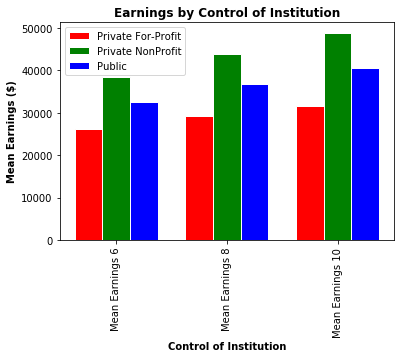

In [102]:
#Bar Chart Control of Institution -- $$$

bar_width = 0.25

private_forprofit = (26130.08, 29191.60, 31535.92)
private_nonprofit = (38516.33, 43896.80, 48875.99)
public = (32513.04, 36760.92, 40495.48)

r1 = np.arange(len(private_forprofit))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, private_forprofit, color='r', width=bar_width, edgecolor='white',
                label='Private For-Profit')
plt.bar(r2, private_nonprofit, color='g', width=bar_width, edgecolor='white',
                label='Private NonProfit')
plt.bar(r3, public, color='b', width=bar_width, edgecolor='white',
                label='Public')

plt.xlabel('Control of Institution', fontweight='bold')
plt.ylabel('Mean Earnings ($)', fontweight='bold')

x_axis = np.arange(len(private_forprofit))
tick_location = [x+bar_width for x in x_axis]

plt.xticks(tick_location, ['Mean Earnings 6', 'Mean Earnings 8', 'Mean Earnings 10'], rotation="vertical")
plt.legend()
plt.title("Earnings by Control of Institution", fontweight='bold')
plt.savefig("EarningsInstitutionBarChart.png", bbox_inches = 'tight')

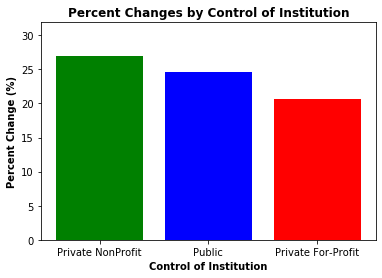

In [103]:
#Bar Chart Control of Institution -- %%%

control_of_institution = ["Private NonProfit", "Public","Private For-Profit"]

percent_changes = [26.89, 24.55, 20.68]

x_axis = np.arange(len(percent_changes))

plt.bar(x_axis, percent_changes, color=['green', 'blue', 'red'], align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, control_of_institution)

plt.ylim(0, max(percent_changes)+5)

plt.title("Percent Changes by Control of Institution", fontweight='bold')
plt.xlabel('Control of Institution', fontweight='bold')
plt.ylabel('Percent Change (%)', fontweight='bold')
plt.savefig("InstitutionPercentChangesBarChart.png", bbox_inches = 'tight')

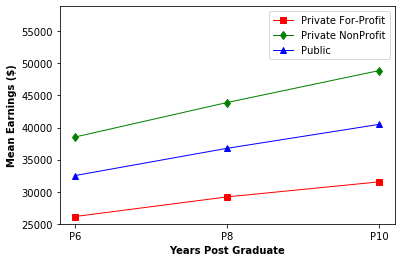

In [104]:
#Line Graph Control of Institution
x_axis = ["P6", "P8", "P10"]

private_forprofit = (26130.08, 29191.60, 31535.92)
private_nonprofit = (38516.33, 43896.80, 48875.99)
public = (32513.04, 36760.92, 40495.48)

private_forprofit_line, = plt.plot(x_axis, private_forprofit, color='red', marker='s', linewidth=1, label="Private For-Profit")
private_nonprofit_line, = plt.plot(x_axis, private_nonprofit, color='green', marker='d', linewidth=1, label="Private NonProfit")
public, = plt.plot(x_axis, public, color='blue', marker='^', linewidth=1, label="Public")

plt.legend(handles=[private_forprofit_line, private_nonprofit_line, public], loc='best')

plt.xlabel('Years Post Graduate', fontweight='bold')
plt.ylabel('Mean Earnings ($)', fontweight='bold')

plt.ylim(25000, max(private_nonprofit)+10000)
plt.savefig("InstitutionLineGraph.png", bbox_inches = 'tight')

In [68]:
top_ten_schools_earnings = institution_earnings_10_df.sort_values(["Mean Earnings 10"], ascending=False).head(10)
top_ten_schools_earnings

,University ID,University Name,Control of Institution,Mean Earnings 10
2643,207315,Oklahoma State University Center for Health Sc...,Public,250000
3594,239169,Medical College of Wisconsin,Private Nonprofit,250000
3562,237880,West Virginia School of Osteopathic Medicine,Public,238200
2192,193830,New York Medical College,Private Nonprofit,229700
1783,177834,A T Still University of Health Sciences,Private Nonprofit,213500
2185,193405,Icahn School of Medicine at Mount Sinai,Private Nonprofit,212300
2898,215123,Philadelphia College of Osteopathic Medicine,Private Nonprofit,209300
3177,223223,Baylor College of Medicine,Private Nonprofit,203900
1481,166708,University of Massachusetts Medical School Wor...,Public,198100
2050,188580,Albany Medical College,Private Nonprofit,185100


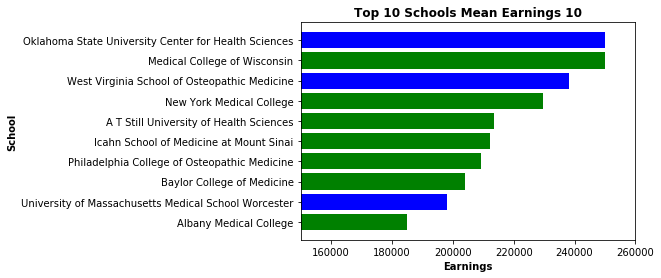

In [105]:
#Horizontal Bar Chart Top 10 Schools by Mean Earnings

universities = ["Albany Medical College", "University of Massachusetts Medical School Worcester", "Baylor College of Medicine",
                "Philadelphia College of Osteopathic Medicine", "Icahn School of Medicine at Mount Sinai", "A T Still University of Health Sciences",
                "New York Medical College", "West Virginia School of Osteopathic Medicine", "Medical College of Wisconsin",
                "Oklahoma State University Center for Health Sciences"]

x_pos = [i for i, _ in enumerate(universities)]

height = [185100, 198100, 203900, 209300, 212300, 213500, 229700, 238200, 250000, 250000]


plt.barh(x_pos, height, color= ["green", "blue", "green", "green", "green", "green", "green", "blue", "green", "blue"], align="center")

plt.yticks(x_pos, universities)
plt.title("Top 10 Schools Mean Earnings 10", fontweight='bold')
plt.xlabel('Earnings', fontweight='bold')
plt.ylabel('School', fontweight='bold')

plt.xlim(150000, 260000)

plt.savefig("Top10Schools.png", bbox_inches = 'tight')

In [106]:
#Pie Chart Top 10 Schools by Mean Earnings

labels = ["Private", "Public"]

sizes = [7, 3]

colors = ["green", "blue"]

explode = (0.1, 0)

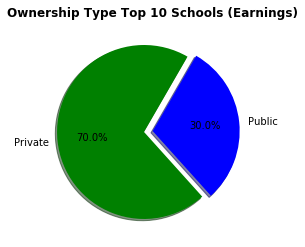

In [114]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=60)
plt.title("Ownership Type Top 10 Schools (Earnings)", fontweight='bold')

plt.savefig("OwnershipPie.png", bbox_inches = 'tight')